In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# 맷플롯립 한글 폰트 지정
import platform
from matplotlib import font_manager, rc

# 한글 설정시 마이너스 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    # mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    # windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 데이터 로드

In [3]:
housing=pd.read_csv('housing.csv')

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# 히스토그램

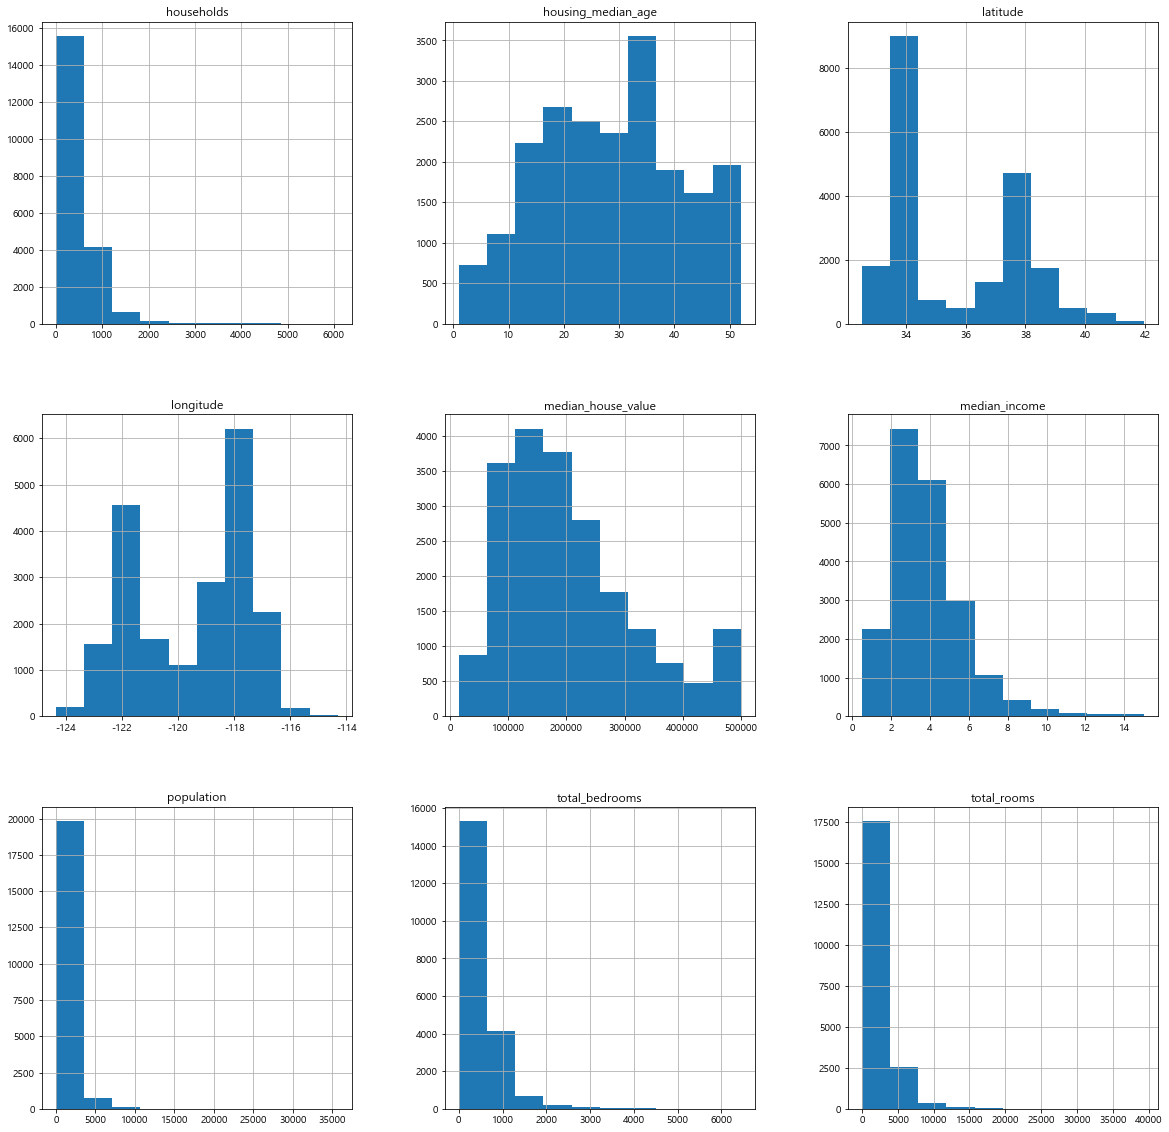

In [11]:
housing.hist(figsize=(20,20))
plt.show()

In [12]:
#원본데이터 복사해두기
housing_origin=housing.copy()
housing_origin.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


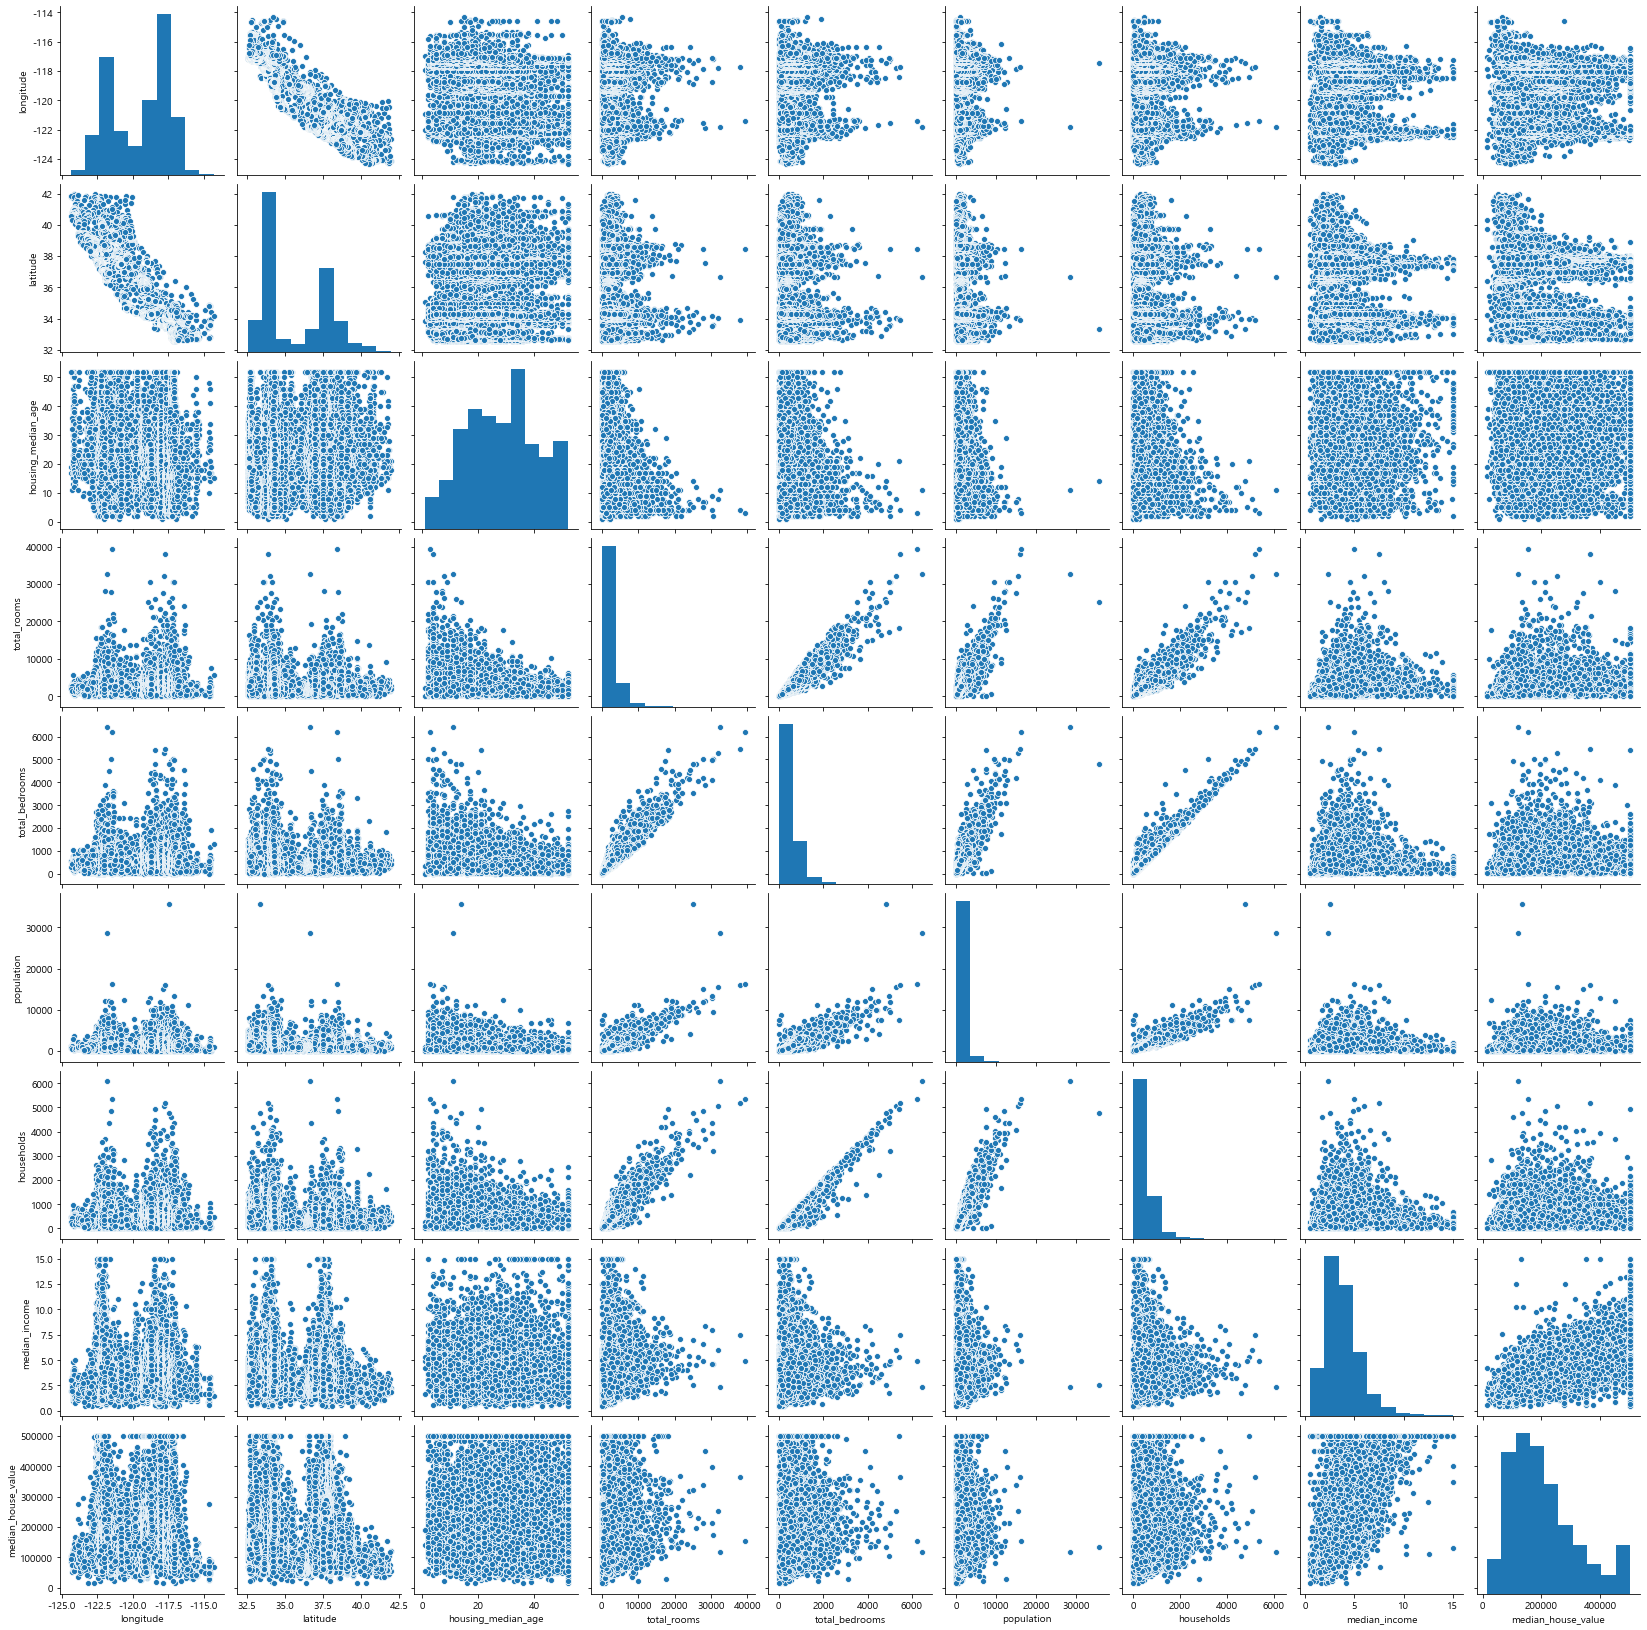

In [13]:
sns.pairplot(housing)

In [14]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


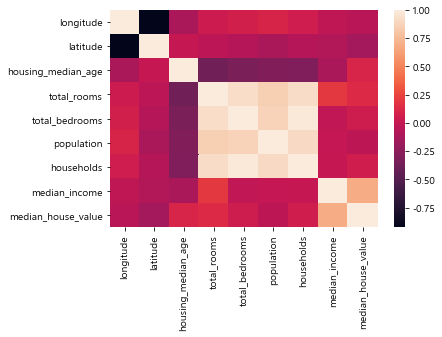

In [15]:
sns.heatmap(housing.corr())

In [18]:
housing.corr()['median_house_value'].abs().sort_values(ascending=False)#절댓값으로 만든 뒤 정렬

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

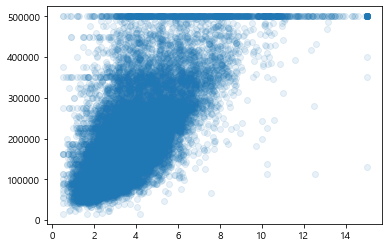

In [22]:
plt.scatter(housing['median_income'],housing['median_house_value'],alpha=0.1)
#수입이 높을수록 집 가격이 높음.
#집값이 50만이 넘으면 잘라버렸기 때문에 위에 선이 생김

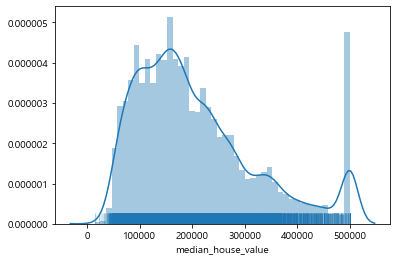

In [27]:
sns.distplot(housing['median_house_value'],rug=True, rug_kws={'alpha':0.1})

# 지리데이터

In [30]:
housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

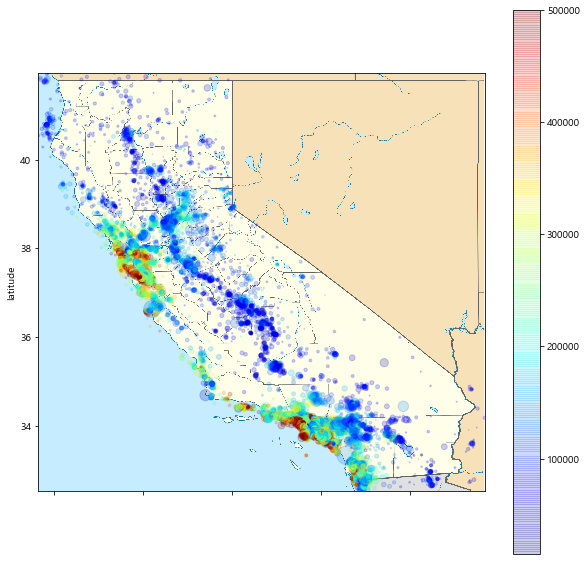

In [49]:
plt.figure()
housing.plot.scatter(x='longitude',y='latitude',
                     s=housing['population']/100,
                     alpha=0.2,
                     figsize=(10,10),
                     c=housing['median_house_value'],
                     cmap=plt.get_cmap('jet'))
img=plt.imread('C:/Users/gram/Documents/GitHub/AI-NLP/califonia.png')
plt.imshow(img,extent=[housing['longitude'].min(),housing['longitude'].max(),
                       housing['latitude'].min(),housing['latitude'].max()])

plt.show()

# 전처리

In [52]:
#인덱스 기점으로 나누기
test_ratio=0.2
train_data=housing.loc[:test_ratio*housing.shape[0], :]
test_data=housing.loc[test_ratio*housing.shape[0]:, :]

In [55]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
4124,-118.22,34.13,35.0,2983.0,526.0,1614.0,543.0,5.7794,272400.0,<1H OCEAN
4125,-118.20,34.14,52.0,2090.0,466.0,1219.0,390.0,4.0909,204200.0,<1H OCEAN
4126,-118.21,34.14,44.0,1681.0,407.0,1105.0,387.0,3.2222,186500.0,<1H OCEAN
4127,-118.21,34.14,25.0,1908.0,628.0,1412.0,588.0,2.2267,189800.0,<1H OCEAN


In [54]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4128,-118.20,34.14,51.0,1941.0,378.0,1012.0,371.0,3.9375,217000.0,<1H OCEAN
4129,-118.19,34.14,47.0,2525.0,523.0,1514.0,498.0,4.3359,209200.0,<1H OCEAN
4130,-118.19,34.13,52.0,2012.0,458.0,1314.0,434.0,3.9250,180400.0,<1H OCEAN
4131,-118.20,34.13,52.0,2035.0,459.0,2589.0,438.0,3.5349,193600.0,<1H OCEAN
4132,-118.21,34.13,52.0,2465.0,611.0,1433.0,570.0,3.2500,214200.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [67]:
#랜덤으로 섞어서 나누기
np.random.seed(0)

idx_arr=np.random.permutation(housing.shape[0])
test_idx=idx_arr[:int(housing.shape[0]*test_ratio)]
train_idx=idx_arr[int(housing.shape[0]*test_ratio):]

train_data=housing.loc[train_idx,:]
test_data=housing.loc[test_idx,:]
train_data.shape, test_data.shape

((16512, 10), (4128, 10))

In [68]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,144600.0,INLAND
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,159400.0,INLAND
9845,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,289300.0,NEAR OCEAN
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,484600.0,<1H OCEAN


In [69]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,136900.0,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,200700.0,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
6655,-118.13,34.16,33.0,2682.0,716.0,2050.0,692.0,2.4817,169500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
1919,-120.92,38.86,11.0,1720.0,345.0,850.0,326.0,3.2027,128600.0,INLAND
1450,-121.95,37.96,18.0,2739.0,393.0,1072.0,374.0,6.1436,259500.0,INLAND


In [57]:
np.random.permutation(10)

array([8, 9, 1, 6, 7, 0, 3, 2, 5, 4])

In [75]:
#sklearn 사용하기
from sklearn.model_selection import train_test_split

In [76]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [77]:
X=housing.drop('median_house_value',axis=1)
Y=housing['median_house_value']

In [81]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [82]:
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [83]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
330,-122.18,37.73,42.0,4074.0,874.0,2736.0,780.0,2.4550,NEAR BAY
13813,-117.04,34.89,37.0,1884.0,366.0,1052.0,353.0,3.1750,INLAND
5510,-118.42,33.99,38.0,740.0,171.0,599.0,194.0,4.0893,<1H OCEAN
10276,-117.88,33.85,22.0,1105.0,241.0,971.0,249.0,3.1667,<1H OCEAN
17381,-120.38,34.96,9.0,2813.0,492.0,1144.0,490.0,4.0431,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
20259,-119.17,34.20,40.0,1083.0,319.0,1843.0,349.0,2.3077,NEAR OCEAN
12506,-121.43,38.56,50.0,1533.0,288.0,532.0,257.0,2.5417,INLAND
5154,-118.26,33.96,39.0,1542.0,375.0,1256.0,361.0,1.7167,<1H OCEAN
14875,-117.08,32.63,33.0,2891.0,793.0,1607.0,754.0,2.1281,NEAR OCEAN


In [91]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=0, stratfy=X['ocean_proximity'])

TypeError: Invalid parameters passed: {'stratfy': 0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object}

In [92]:
housing['ocean_proximity'].value_counts()/len(housing)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [93]:
X_train['ocean_proximity'].value_counts()/len(X_train)

<1H OCEAN     0.441315
INLAND        0.318738
NEAR OCEAN    0.129239
NEAR BAY      0.110586
ISLAND        0.000121
Name: ocean_proximity, dtype: float64

## 결측치 처리

In [95]:
housing.info()#total_bedroom 결측치 207개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 330 to 2751
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## 행 제거

In [98]:
X_train[X_train['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5236,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,<1H OCEAN
19890,-119.15,36.29,18.0,1435.0,NaN,657.0,254.0,2.4281,INLAND
3721,-118.43,34.20,28.0,3386.0,NaN,2240.0,737.0,3.0221,<1H OCEAN
13336,-117.67,34.04,13.0,1543.0,NaN,776.0,358.0,3.0598,INLAND
10236,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
13597,-117.28,34.09,44.0,376.0,NaN,273.0,107.0,2.2917,INLAND
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,NEAR OCEAN
14015,-117.17,32.75,52.0,1052.0,NaN,381.0,201.0,3.0726,NEAR OCEAN
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND


In [101]:
X_train.shape

(16512, 9)

In [100]:
X_train.dropna().shape

(16346, 9)

## 열 제거

In [102]:
X_train.dropna(axis=1).shape

(16512, 8)

In [104]:
X_train.median()

longitude             -118.5000
latitude                34.2600
housing_median_age      29.0000
total_rooms           2130.0000
total_bedrooms         435.0000
population            1167.0000
households             410.0000
median_income            3.5313
dtype: float64

In [106]:
X_train.fillna(X_train.median())#중앙값 채우기

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
330,-122.18,37.73,42.0,4074.0,874.0,2736.0,780.0,2.4550,NEAR BAY
13813,-117.04,34.89,37.0,1884.0,366.0,1052.0,353.0,3.1750,INLAND
5510,-118.42,33.99,38.0,740.0,171.0,599.0,194.0,4.0893,<1H OCEAN
10276,-117.88,33.85,22.0,1105.0,241.0,971.0,249.0,3.1667,<1H OCEAN
17381,-120.38,34.96,9.0,2813.0,492.0,1144.0,490.0,4.0431,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
20259,-119.17,34.20,40.0,1083.0,319.0,1843.0,349.0,2.3077,NEAR OCEAN
12506,-121.43,38.56,50.0,1533.0,288.0,532.0,257.0,2.5417,INLAND
5154,-118.26,33.96,39.0,1542.0,375.0,1256.0,361.0,1.7167,<1H OCEAN
14875,-117.08,32.63,33.0,2891.0,793.0,1607.0,754.0,2.1281,NEAR OCEAN


In [107]:
X_train.fillna(X_train.median()).describe() #중앙값은 트레인 데이터에 대한 것을 넣어야함. 알고리즘 학습시켜준 데이터임.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.574055,35.637841,28.557110,2642.643532,538.001817,1427.537730,500.658491,3.870412
std,2.003420,2.139914,12.593037,2198.301263,422.581301,1148.921436,385.714152,1.895369
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1451.000000,298.000000,786.000000,280.000000,2.568050
50%,-118.500000,34.260000,29.000000,2130.000000,435.000000,1167.000000,410.000000,3.531300
75%,-118.000000,37.720000,37.000000,3161.000000,645.000000,1726.250000,606.000000,4.738700
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100
